# Analysis Gestalt appreciation & numerosity estimation experiment



In [114]:
from statsmodels.stats.power import tt_solve_power, FTestPower
import pandas as pd
from pandas import DataFrame
from psychopy import data, core, gui, misc
import numpy as np
import seaborn as sns
from fuzzywuzzy import fuzz
#from ggplot import *
from scipy import stats
import matplotlib as mpl
mpl.use('pdf')
import statsmodels.formula.api as smf
import statsmodels.api as sm

from matplotlib import rcParams
rcParams['font.family'] = 'ubuntu'
from pivottablejs import pivot_ui
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [13]:
tt_solve_power(effect_size = 0.43, alpha = 0.05, nobs=None, power = 0.8)



44.40824513171133

In [2]:
# get data file names
files = gui.fileOpenDlg("../data", allowed="csv files (*.csv)|*.csv")

dfs = []

for filename in files:
    
    print(filename)
    df = pd.read_table(filename, sep=",") #only Appreciation trials 85
   
    dfs.append(df)
    
    
df = pd.concat(dfs, ignore_index=True)    

/home/sander/Dropbox/exp/GestaltAppreciation/data/19201_Gestalt_exp1_2016_Apr_21_1208.csv
/home/sander/Dropbox/exp/GestaltAppreciation/data/15928_Gestalt_exp1_2016_May_03_1106.csv
/home/sander/Dropbox/exp/GestaltAppreciation/data/17959_Gestalt_exp1_2016_May_02_1508.csv
/home/sander/Dropbox/exp/GestaltAppreciation/data/11755_Gestalt_exp1_2016_Apr_21_1606.csv
/home/sander/Dropbox/exp/GestaltAppreciation/data/21511_Gestalt_exp1_2016_May_03_1405.csv
/home/sander/Dropbox/exp/GestaltAppreciation/data/20803_Gestalt_exp1_2016_Apr_28_1404.csv
/home/sander/Dropbox/exp/GestaltAppreciation/data/23125_Gestalt_exp1_2016_May_04_1404.csv
/home/sander/Dropbox/exp/GestaltAppreciation/data/20404_Gestalt_exp1_2016_May_02_1605.csv
/home/sander/Dropbox/exp/GestaltAppreciation/data/22339_Gestalt_exp1_2016_Apr_15_0910.csv
/home/sander/Dropbox/exp/GestaltAppreciation/data/22567_Gestalt_exp1_2016_May_02_1406.csv
/home/sander/Dropbox/exp/GestaltAppreciation/data/22246_Gestalt_exp1_2016_Apr_21_0913.csv
/home/sand

In [78]:
df.head()



,images,condition,imgB,imgA,trials.thisRepN,trials.thisTrialN,trials.thisN,trials.thisIndex,numLoop.thisRepN,numLoop.thisTrialN,...,numResp.rt,date,frameRate,expName,session,participant,Unnamed: 27,Geslacht,Geboortejaar,Totaalscore
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2016_May_04_1404,59.903139,Gestalt_exp1,1,23125,NaN,NaN,NaN,NaN
1,images/INVk16.bmp,inverted,NaN,NaN,0,0,0,70,NaN,NaN,...,NaN,2016_May_04_1404,59.903139,Gestalt_exp1,1,23125,NaN,NaN,NaN,NaN
2,images/INVk12.bmp,inverted,NaN,NaN,0,1,1,67,NaN,NaN,...,NaN,2016_May_04_1404,59.903139,Gestalt_exp1,1,23125,NaN,NaN,NaN,NaN
3,images/k07.bmp,gestalt,NaN,NaN,0,2,2,6,NaN,NaN,...,NaN,2016_May_04_1404,59.903139,Gestalt_exp1,1,23125,NaN,NaN,NaN,NaN
4,images/INVk06.bmp,inverted,NaN,NaN,0,3,3,64,NaN,NaN,...,NaN,2016_May_04_1404,59.903139,Gestalt_exp1,1,23125,NaN,NaN,NaN,NaN


In [37]:
dfApp = df[pd.notnull(df.images)]       
dfNum = df[pd.notnull(df.imgA)]

print 'total len:', len(dfApp)
print 'total len:', len(dfNum)

#df.to_csv('partialsetApril2016' + '.csv', sep='\t')


#add var for img
dfApp.loc[:,"img"]= dfApp.images.str.extract("(\d+)")
dfNum.loc[:,"img"]= dfNum.imgA.str.extract("(\d+)")

total len: 3403
total len: 3116


In [34]:
dfApp.head()

,Unnamed: 26,Unnamed: 27,condition,date,expName,frameRate,images,imgA,imgB,key_resp_2.keys,...,rating.response,rating.rt,response.keys,response.rt,session,trials.thisIndex,trials.thisN,trials.thisRepN,trials.thisTrialN,img
1,NaN,NaN,scrambled,2016_Apr_21_1208,Gestalt_exp1,60.250783,images/i02.bmp,NaN,NaN,NaN,...,1,8.919,NaN,NaN,1,31,0,0,0,02
2,NaN,NaN,scrambled,2016_Apr_21_1208,Gestalt_exp1,60.250783,images/i23.bmp,NaN,NaN,NaN,...,1,3.534,NaN,NaN,1,52,1,0,1,23
3,NaN,NaN,inverted,2016_Apr_21_1208,Gestalt_exp1,60.250783,images/INVk10.bmp,NaN,NaN,NaN,...,1,3.719,NaN,NaN,1,66,2,0,2,10
4,NaN,NaN,gestalt,2016_Apr_21_1208,Gestalt_exp1,60.250783,images/k08.bmp,NaN,NaN,NaN,...,2,4.403,NaN,NaN,1,7,3,0,3,08
5,NaN,NaN,scrambled,2016_Apr_21_1208,Gestalt_exp1,60.250783,images/i21.bmp,NaN,NaN,NaN,...,3,2.069,NaN,NaN,1,50,4,0,4,21


# Appreciation data

* condition
* rating.response
* rating.rt

In [39]:
dfApp = dfApp.rename(columns={'rating.response': 'rating'})
print dfApp.columns



Index([u'Unnamed: 26', u'Unnamed: 27', u'condition', u'date', u'expName',
       u'frameRate', u'images', u'imgA', u'imgB', u'key_resp_2.keys',
       u'key_resp_2.rt', u'numLoop.thisIndex', u'numLoop.thisN',
       u'numLoop.thisRepN', u'numLoop.thisTrialN', u'numResp.Alocation',
       u'numResp.corr', u'numResp.keys', u'numResp.rt', u'participant',
       u'rating', u'rating.rt', u'response.keys', u'response.rt', u'session',
       u'trials.thisIndex', u'trials.thisN', u'trials.thisRepN',
       u'trials.thisTrialN', u'img'],
      dtype='object')


### Does gestaltness influence appreciation? 

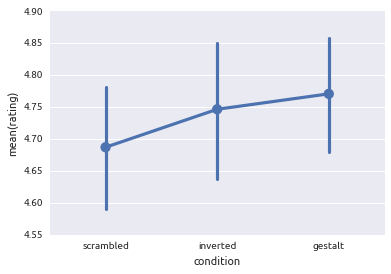

In [26]:
#sns.violinplot(x="condition", y="rating.response", data=dfApp);
sns.pointplot(x="condition", y="rating",unit="participant", data=dfApp);


In [41]:
# GLM test

model = smf.glm(formula="rating ~ condition", data=dfApp)
#model = smf.ols(formula="rating ~ condition", data=dfApp)

results = model.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 rating   No. Observations:                 3403
Model:                            GLM   Df Residuals:                     3371
Model Family:                Gaussian   Df Model:                           31
Link Function:               identity   Scale:                   2.77727062245
Method:                          IRLS   Log-Likelihood:                -6550.6
Date:                 do, 26 mei 2016   Deviance:                       9362.2
Time:                        02:09:12   Pearson chi2:                 9.36e+03
No. Iterations:                     4                                         
                             coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                  4.8142      0.156     30.947      0.000         4.509     5.119
condition[T.inve

## Correlation between individual difference scores (appreciation of Gestalt minus scrambled patterns) and PNS scores

In [28]:
# compute diff score to correlate with PNS score

print(len(dfApp['participant'].unique()))

def diffScore(df):
    
    gestaltm =  df[df.condition=='gestalt'].rating.mean()
    scrambledm = df[df.condition=='scrambled'].rating.mean()
    
    diff= gestaltm - scrambledm
    
    #df['id'].iloc[0]
    dfout = pd.DataFrame(data=[(gestaltm, scrambledm, diff)], columns=['gestaltm', 'scrambledm', 'diff'])
    
    return dfout

dfdiff = dfApp.groupby('participant').apply(diffScore)
dfdiff = dfdiff.reset_index()


# add PNS scores
dfPNS = pd.read_table("ScoringPNS.csv", sep=",") 
dfPNS = dfPNS.iloc[4:,:]
dfPNS["participant"] = pd.to_numeric(dfPNS["participant"])
dfmerged= pd.merge(dfdiff, dfPNS, how='outer', on='participant')
dfmerged.head()


41


,participant,level_1,gestaltm,scrambledm,diff,Geslacht,Geboortejaar,Totaalscore
0,9010,0,5.000000,4.966667,0.033333,vrouw,1992,59
1,11707,0,5.300000,4.966667,0.333333,vrouw,1995,49
2,11755,0,5.466667,5.866667,-0.400000,vrouw,1995,46
3,13201,0,4.933333,4.500000,0.433333,vrouw,1994,34
4,15928,0,5.066667,4.966667,0.100000,vrouw,1996,42


### Does higher PNS (personal need for structure) imply higher relative appreciation of Gestalt vs scrambled patterns?

0.083739837398373998

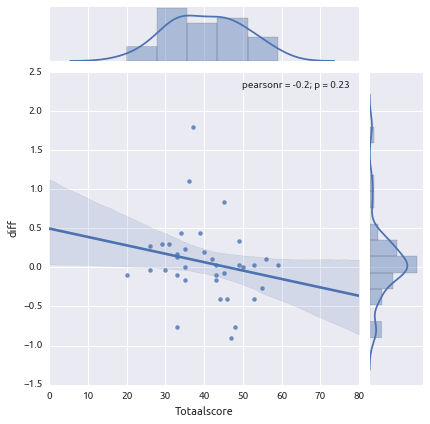

In [29]:
sns.jointplot(x="Totaalscore", y="diff", data=dfmerged, kind="reg");
dfmerged["diff"].mean()

# Numerosity data

In [56]:
#print dfNum.columns
#print dfNum.dtypes
dfNum = dfNum.rename(columns={'numResp.corr': 'acc','numResp.rt': 'rt', 'numResp.Alocation': 'Alocation' })
dfNum.head()

,Unnamed: 26,Unnamed: 27,condition,date,expName,frameRate,images,imgA,imgB,key_resp_2.keys,...,rating.response,rating.rt,response.keys,response.rt,session,trials.thisIndex,trials.thisN,trials.thisRepN,trials.thisTrialN,img
85,NaN,NaN,Gestalt-scrambled,2016_Apr_21_1208,Gestalt_exp1,60.250783,NaN,images/k18.bmp,images/i18.bmp,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,18
86,NaN,NaN,Inverted-Gestalt,2016_Apr_21_1208,Gestalt_exp1,60.250783,NaN,images/INVk03.bmp,images/k02.bmp,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,03
87,NaN,NaN,Gestalt-scrambled,2016_Apr_21_1208,Gestalt_exp1,60.250783,NaN,images/k05.bmp,images/i05.bmp,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,05
88,NaN,NaN,Gestalt-scrambled,2016_Apr_21_1208,Gestalt_exp1,60.250783,NaN,images/k22.bmp,images/i22.bmp,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,22
89,NaN,NaN,Inverted-scrambled,2016_Apr_21_1208,Gestalt_exp1,60.250783,NaN,images/INVk03.bmp,images/i02.bmp,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,03


In [15]:
dfNum.columns
#dfNum["condition"].loc[dfNum.condition== "Inverted-scrambled"]= "Scrambled-Inverted"

In [22]:
dfNum.head()


,Unnamed: 26,Unnamed: 27,condition,date,expName,frameRate,images,imgA,imgB,key_resp_2.keys,...,participant,rating.response,rating.rt,response.keys,response.rt,session,trials.thisIndex,trials.thisN,trials.thisRepN,trials.thisTrialN
85,NaN,NaN,Gestalt-scrambled,2016_Apr_21_1208,Gestalt_exp1,60.250783,NaN,images/k18.bmp,images/i18.bmp,NaN,...,19201,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
86,NaN,NaN,Inverted-Gestalt,2016_Apr_21_1208,Gestalt_exp1,60.250783,NaN,images/INVk03.bmp,images/k02.bmp,NaN,...,19201,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
87,NaN,NaN,Gestalt-scrambled,2016_Apr_21_1208,Gestalt_exp1,60.250783,NaN,images/k05.bmp,images/i05.bmp,NaN,...,19201,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
88,NaN,NaN,Gestalt-scrambled,2016_Apr_21_1208,Gestalt_exp1,60.250783,NaN,images/k22.bmp,images/i22.bmp,NaN,...,19201,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
89,NaN,NaN,Inverted-scrambled,2016_Apr_21_1208,Gestalt_exp1,60.250783,NaN,images/INVk03.bmp,images/i02.bmp,NaN,...,19201,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN


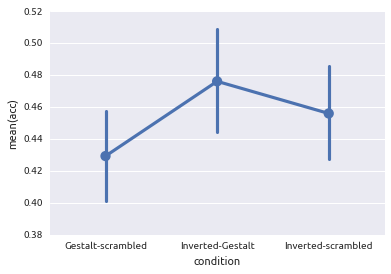

In [23]:
sns.pointplot(x="condition", y="acc",unit="participant", data=dfNum);


In [30]:
model = smf.glm(formula="acc ~ condition", data=dfNum,  family=sm.families.Binomial())

results = model.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    acc   No. Observations:                 3116
Model:                            GLM   Df Residuals:                     3113
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2142.8
Date:                 do, 26 mei 2016   Deviance:                       4285.5
Time:                        01:47:51   Pearson chi2:                 3.12e+03
No. Iterations:                     6                                         
                                      coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------
Intercept                          -0.2848      0.058     -4.945      0.000        -0.398

# Checking for low-level characteristics

In [59]:
# prerequisites

import os, re
import matplotlib.pyplot as plt
from skimage.data import data_dir
from skimage.util import img_as_ubyte
from skimage.morphology import skeletonize, convex_hull_image
from skimage import io
from skimage.measure import label, regionprops


def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax1.set_adjustable('box-forced')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    ax2.set_adjustable('box-forced')


In [69]:

# get data file names
files = gui.fileOpenDlg("../images", allowed="bmp files (*.bmp)|*.bmp")

d = []

for filename in files:
    
    #print(filename)
    stim = io.imread(filename, as_grey=True)
    stim = img_as_ubyte(io.imread(filename, as_grey=True))
    #fig, ax = plt.subplots()
    #ax.imshow(stim, cmap=plt.cm.gray)
    chull = convex_hull_image(stim == 0)
    #plot_comparison(stim, chull, 'convex hull')
    label_img = label(chull)
    regions_img = regionprops(label_img)
    region = regions_img[0]

    hull= float(region.convex_area)/(chull.shape[0]*chull.shape[1])
    print "percentage pixels of convex hull image: ", hull
    d.append({'images': filename.split("GestaltAppreciation/")[1] ,'hull': hull})

#print d                 
stims = pd.DataFrame(d)


percentage pixels of convex hull image:  0.433644444444
percentage pixels of convex hull image:  0.614855555556
percentage pixels of convex hull image:  0.526588888889
percentage pixels of convex hull image:  0.291833333333
percentage pixels of convex hull image:  0.390255555556
percentage pixels of convex hull image:  0.463811111111
percentage pixels of convex hull image:  0.557422222222
percentage pixels of convex hull image:  0.447044444444
percentage pixels of convex hull image:  0.732866666667
percentage pixels of convex hull image:  0.235755555556
percentage pixels of convex hull image:  0.613522222222
percentage pixels of convex hull image:  0.273833333333
percentage pixels of convex hull image:  0.204877777778
percentage pixels of convex hull image:  0.602644444444
percentage pixels of convex hull image:  0.496922222222
percentage pixels of convex hull image:  0.478988888889
percentage pixels of convex hull image:  0.355022222222
percentage pixels of convex hull image:  0.15061

In [71]:
dfmerged= pd.merge(dfApp, stims, how='outer', on='images')
dfmerged.head()

,Unnamed: 26,Unnamed: 27,condition,date,expName,frameRate,images,imgA,imgB,key_resp_2.keys,...,rating.rt,response.keys,response.rt,session,trials.thisIndex,trials.thisN,trials.thisRepN,trials.thisTrialN,img,hull
0,NaN,NaN,scrambled,2016_Apr_21_1208,Gestalt_exp1,60.250783,images/i02.bmp,NaN,NaN,NaN,...,8.919,NaN,NaN,1,31,0,0,0,02,0.556033
1,NaN,NaN,scrambled,2016_May_03_1106,Gestalt_exp1,59.918629,images/i02.bmp,NaN,NaN,NaN,...,1.536,NaN,NaN,1,31,22,0,22,02,0.556033
2,NaN,NaN,scrambled,2016_May_02_1508,Gestalt_exp1,59.690780,images/i02.bmp,NaN,NaN,NaN,...,1.068,NaN,NaN,1,31,73,0,73,02,0.556033
3,NaN,NaN,scrambled,2016_Apr_21_1606,Gestalt_exp1,59.929758,images/i02.bmp,NaN,NaN,NaN,...,1.869,NaN,NaN,1,31,45,0,45,02,0.556033
4,NaN,NaN,scrambled,2016_May_03_1405,Gestalt_exp1,59.927275,images/i02.bmp,NaN,NaN,NaN,...,1.352,NaN,NaN,1,31,47,0,47,02,0.556033


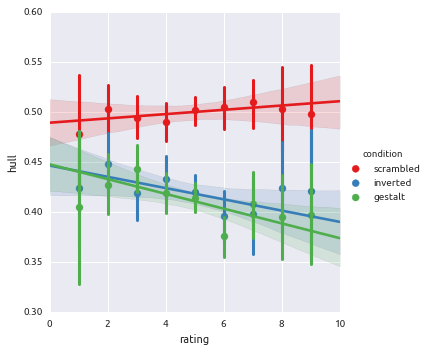

In [107]:
sns.lmplot(x="rating", y="hull", hue="condition", data=dfmerged, x_estimator=np.mean, palette="Set1");


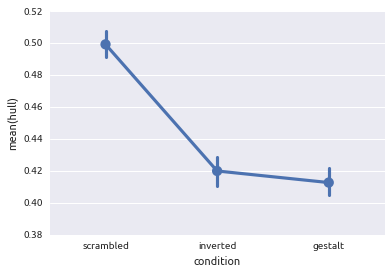

In [118]:
sns.pointplot(x="condition", y="hull", data=dfmerged, linestyles=["-"]);

In [101]:
# GLM test

model = smf.glm(formula="rating ~ condition * hull", data=dfmerged)
#model = smf.ols(formula="rating ~ hull", data=dfmerged)

results = model.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 rating   No. Observations:                 3403
Model:                            GLM   Df Residuals:                     3397
Model Family:                Gaussian   Df Model:                            5
Link Function:               identity   Scale:                   2.82427229135
Method:                          IRLS   Log-Likelihood:                -6592.2
Date:                 do, 26 mei 2016   Deviance:                       9594.1
Time:                        03:25:41   Pearson chi2:                 9.59e+03
No. Iterations:                     4                                         
                                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
Intercept                       5.1433      0.138     37.255      0.000         4.873     5.414
c